# Generate the Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize']=(10.0,8.0)
plt.rcParams['image.interpolation']='nearest'
plt.rcParams['image.cmap']='gray'

(-1.0, 1.0)

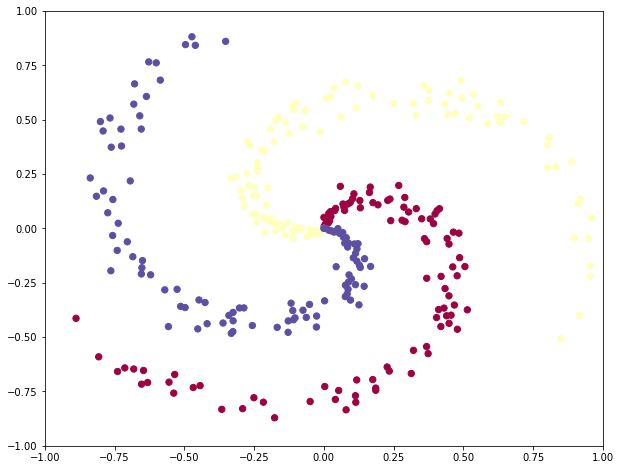

In [ ]:
np.random.seed(0)
N=100
D=2
K=3
X=np.zeros((N*K,D))
Y=np.zeros(N*K,dtype='uint8')
for j in range(K):
  ix=range(N*j,N*(j+1))
  r=np.linspace(0.0,1,N)
  t=np.linspace(j*4,(j+1)*4,N)+np.random.randn(N)*0.2
  X[ix]=np.c_[r*np.sin(t),r*np.cos(t)]
  Y[ix]=j
fig=plt.figure()
plt.scatter(X[:,0],X[:,1],c=Y,s=40,cmap=plt.cm.Spectral)
plt.ylim([-1,1])
plt.xlim([-1,1])

In [ ]:
print(X.shape)
print(Y.shape)
W=0.01*np.random.randn(D,K)
b=np.zeros((1,K))
scores=np.dot(X,W)
print(scores.shape)
print(b)
print(b.shape)

(300, 2)
(300,)
(300, 3)
[[0. 0. 0.]]
(1, 3)


# Linear classifier (one layer NN)

In [ ]:
W=0.01*np.random.randn(D,K)
b=np.zeros((1,K))

print(W.shape)
print(X.shape)

step_size=1e-0
reg=1e-3

num_examples=X.shape[0]
for i in range(200):
  scores=np.dot(X,W)+b
  exp_scores=np.exp(scores)
  probs=exp_scores/np.sum(exp_scores,axis=1,keepdims=True)

  corect_logprobs=-np.log(probs[range(num_examples),Y])
  data_loss=np.sum(corect_logprobs)/num_examples
  reg_loss=0.5*reg*np.sum(W*W)
  loss=data_loss+reg_loss
  if i%10==0:
    print("iteration %d: loss %f" % (i,loss))

  
  dscores=probs
  #print("=================DSCORES====================1")
  #print(dscores)
  dscores[range(num_examples),Y]-=1
  #print("=================DSCORES====================2")
  #print(dscores)
  #print("=================DSCORES====================2")
  #print(Y)
  dscores/=num_examples
  #print("=================DSCORES====================3")
  #print(dscores)
  
  dw=np.dot(X.T,dscores)
  #print("=================dw====================3")
  #print(dw)

  db=np.sum(dscores, axis=0,keepdims=True)
  #print("=================db====================3")
  #print(db)

  #break
  dw+=reg*W

  W+=-step_size*dw
  b+=-step_size*db




(2, 3)
(300, 2)
iteration 0: loss 1.099164
iteration 10: loss 0.918010
iteration 20: loss 0.851812
iteration 30: loss 0.822484
iteration 40: loss 0.807664
iteration 50: loss 0.799493
iteration 60: loss 0.794708
iteration 70: loss 0.791781
iteration 80: loss 0.789931
iteration 90: loss 0.788733
iteration 100: loss 0.787942
iteration 110: loss 0.787412
iteration 120: loss 0.787051
iteration 130: loss 0.786804
iteration 140: loss 0.786634
iteration 150: loss 0.786515
iteration 160: loss 0.786432
iteration 170: loss 0.786373
iteration 180: loss 0.786332
iteration 190: loss 0.786302


In [ ]:
scores=X.dot(W)+b
predicted_class=np.argmax(scores, axis=1)
print("training accuracy: %.2f" % (np.mean(predicted_class==Y)))


training accuracy: 0.49


(-1.8712034092398278, 1.8687965907601756)

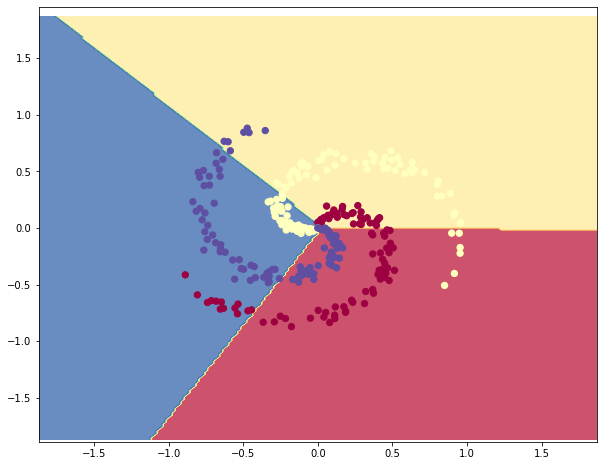

In [ ]:
h=0.02
x_min, x_max=X[:,0].min()-1,X[:,0].max()+1
y_min, y_max=X[:,1].min() -1, X[:,1].max()+1

xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
Z=np.dot(np.c_[xx.ravel(),yy.ravel()],W)+b
Z=np.argmax(Z,axis=1)
Z=Z.reshape(xx.shape)
fig=plt.figure()

plt.contourf(xx,yy,Z, cmap=plt.cm.Spectral,alpha=0.8)
plt.scatter(X[:,0],X[:,1],c=Y,s=40,cmap=plt.cm.Spectral)
plt.ylim(xx.min(),xx.max())
plt.xlim(yy.min(),yy.max())

# using 2-layer NN 

For this code, the batch is the whole data. What if your batch size is 32 or 128?

In [ ]:
h=100
W=0.01*np.random.randn(D,h)
b=np.zeros((1,h))
W2=0.01*np.random.randn(h,K)
b2=np.zeros((1,K))


step_size=1e-0
reg=1e-3
num_examples=X.shape[0]
for i in range(10000):

  hidden_layer=np.maximum(0,np.dot(X,W)+b) #relu
  scores=np.dot(hidden_layer,W2)+b2 # calculating x for softmax

  # softmax
  exp_scores=np.exp(scores)
  probs=exp_scores/np.sum(exp_scores,axis=1,keepdims=True)


  correct_logprobs=-np.log(probs[range(num_examples),Y])
  data_loss=np.sum(correct_logprobs)/num_examples
  reg_loss=0.5*reg*np.sum(W*W)+0.5*reg*np.sum(W2*W2)
  loss=data_loss+reg_loss
  if i%1000==0:
    print("iteration %d: loss %f" % (i,loss))

  
  dscores=probs
  dscores[range(num_examples),Y]-=1
  dscores/=num_examples

  dw2=np.dot(hidden_layer.T,dscores)
  db2=np.sum(dscores, axis=0,keepdims=True)

  dhidden=np.dot(dscores,W2.T)
  dhidden[hidden_layer <=0]=0

  dw=np.dot(X.T,dhidden)
  db=np.sum(dhidden,axis=0,keepdims=True)

  #dw=np.dot(X.T,dhidden)
  #db=np.sum(dhidden,axis=0,keepdims=True)
  #print(W2.shape)
  
  dw2+=reg*W2
  dw+=reg*W

  W+=-step_size*dw
  b+=-step_size*db
  W2+=-step_size*dw2
  b2+=-step_size*db2


iteration 0: loss 1.098765
iteration 1000: loss 0.292278
iteration 2000: loss 0.256588
iteration 3000: loss 0.248217
iteration 4000: loss 0.246182
iteration 5000: loss 0.245667
iteration 6000: loss 0.245437
iteration 7000: loss 0.245281
iteration 8000: loss 0.245177
iteration 9000: loss 0.245096


In [ ]:
hidden_layer=np.maximum(0,np.dot(X,W)+b)
scores=np.dot(hidden_layer,W2)+b2
predicted_class=np.argmax(scores,axis=1)
print("training accuracy: %.2f" % (np.mean(predicted_class==Y)))

training accuracy: 0.98


(-1.8712034092398278, 1.8687965907601756)

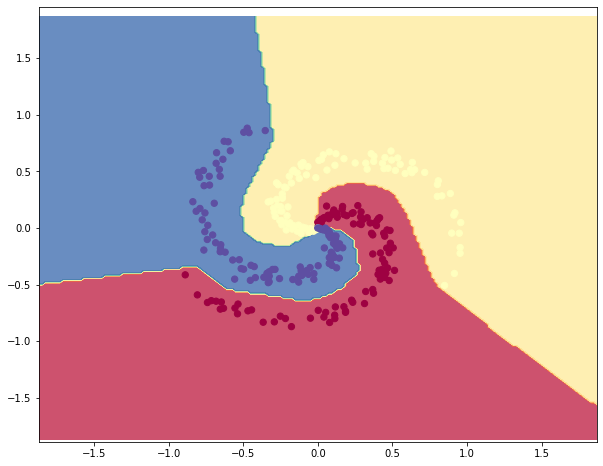

In [ ]:
h=0.02
x_min, x_max=X[:,0].min()-1,X[:,0].max()+1
y_min, y_max=X[:,1].min() -1, X[:,1].max()+1

xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
hidden_layer=np.maximum(0,np.dot(np.c_[xx.ravel(),yy.ravel()],W)+b)
Z=np.dot(hidden_layer,W2)+b2
Z=np.argmax(Z,axis=1)
Z=Z.reshape(xx.shape)
fig=plt.figure()

plt.contourf(xx,yy,Z, cmap=plt.cm.Spectral,alpha=0.8)
plt.scatter(X[:,0],X[:,1],c=Y,s=40,cmap=plt.cm.Spectral)
plt.ylim(xx.min(),xx.max())
plt.xlim(yy.min(),yy.max())

# Using Pytorch to implement two layer NN

In [ ]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import time


In [ ]:
class TwoLayerNet(torch.nn.Module):
  def __init__(self,D_in,H,D_out):
    # two layer neural network defined
      super(TwoLayerNet,self).__init__()
      self.linear1=torch.nn.Linear(D_in,H)
      self.linear2=torch.nn.Linear(H,D_out)
  def forward(self,x):
    h_relu=self.linear1(x).clamp(min=0)
    y_pred=self.linear2(h_relu)
    return y_pred

In [ ]:
D_in=2
H=100
D_out=3
model=TwoLayerNet(D_in,H,D_out)

loss_fun=torch.nn.CrossEntropyLoss(reduction="sum")
optimizer=torch.optim.SGD(model.parameters(),lr=1e-4)
x=torch.tensor(X)
y=torch.tensor(Y)
for t in range(50000):
  y_pred=model(x.float())
  #print(y_pred.shape)
  #print(y.shape)
  loss=loss_fun(y_pred,y)
  #print(t,loss.item())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

(-1.8712034092398278, 1.8687965907601756)

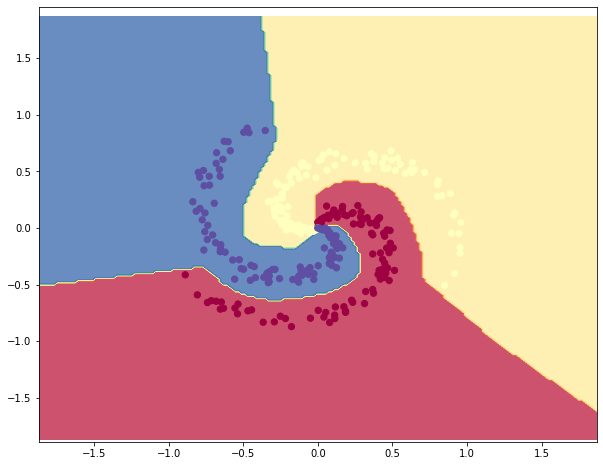

In [ ]:
h=0.02
x_min, x_max=X[:,0].min()-1,X[:,0].max()+1
y_min, y_max=X[:,1].min() -1, X[:,1].max()+1

xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
xT=torch.tensor(np.c_[xx.ravel(),yy.ravel()])
Z=model(xT.float())
Z=Z.detach().numpy()
Z=np.argmax(Z,axis=1)
Z=Z.reshape(xx.shape)
fig=plt.figure()

plt.contourf(xx,yy,Z, cmap=plt.cm.Spectral,alpha=0.8)
plt.scatter(X[:,0],X[:,1],c=Y,s=40,cmap=plt.cm.Spectral)
plt.ylim(xx.min(),xx.max())
plt.xlim(yy.min(),yy.max())

# For LeNet
https://towardsdatascience.com/implementing-yann-lecuns-lenet-5-in-pytorch-5e05a0911320
